In [2]:
import pandas as pd
# sqlalchemy SQL tools and object relational mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# Create engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# Reflect an existing database into a new model
Base = automap_base()

In [5]:
# Reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station     = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Perform a query to retrieve the june weather data for all years
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(func.extract('month', Measurement.date) == 6).all()
june_all_years_tobs_df = pd.DataFrame(results, columns=['date','tobs'])

In [10]:
june_all_years_tobs_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


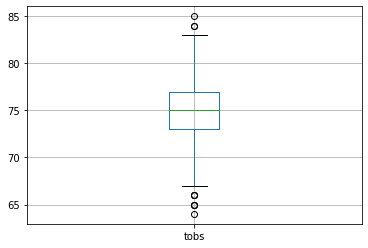

In [11]:
june_all_years_tobs_df.boxplot(column='tobs')

In [12]:
june_all_years_tobs_df["day_of_month"] = pd.to_datetime(june_all_years_tobs_df["date"]).dt.day

In [13]:
june_tobs_daily_avg_all_years_df = june_all_years_tobs_df[["day_of_month","tobs"]].groupby(["day_of_month"]).mean()

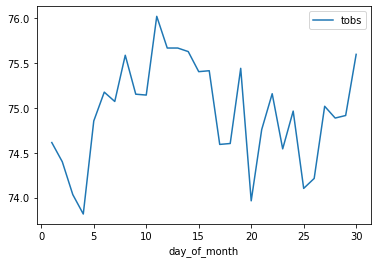

In [14]:
june_tobs_daily_avg_all_years_df.plot(kind="line")

In [15]:
# Perform a query to retrieve the december weather data for all years
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(func.extract('month', Measurement.date) == 12).all()
december_all_years_tobs_df = pd.DataFrame(results, columns=['date','tobs'])

In [16]:
december_all_years_tobs_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


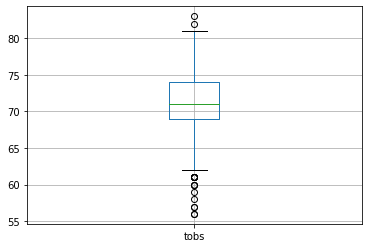

In [17]:
december_all_years_tobs_df.boxplot(column='tobs')

In [18]:
december_all_years_tobs_df["day_of_month"] = pd.to_datetime(december_all_years_tobs_df["date"]).dt.day

In [19]:
december_tobs_daily_avg_all_years_df = december_all_years_tobs_df[["day_of_month","tobs"]].groupby(["day_of_month"]).mean()

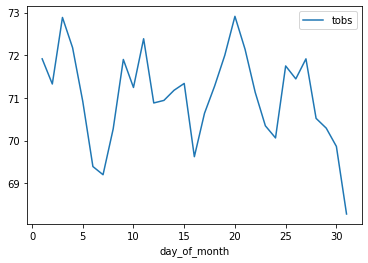

In [20]:
december_tobs_daily_avg_all_years_df.plot(kind="line")